In [3]:
from os import path
import numpy as np
import torch
import torchvision
from torchvision.datasets import VOCDetection

import datasets.voc as voc
import datasets.display as disp
import model.ssd as ssd

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
data = VOCDetection(voc.VOC_ROOT, year='2007',
                    target_transform=voc.extract_VOC_detections)

In [6]:
img, target = data[10]

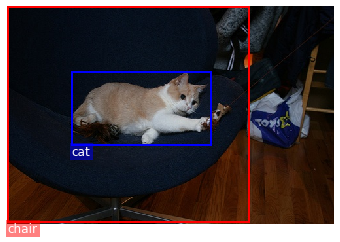

In [7]:
disp.show_detections(img, target, voc.VOC_CLASSES)

In [8]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.Resize((300, 300)),
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize(voc.VOC_MEAN, [1, 1, 1])])
data = VOCDetection(voc.VOC_ROOT, year='2007', transform=transform, 
                    target_transform=voc.extract_VOC_detections)

In [9]:
train_loader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True, 
                                           collate_fn=voc.collate_VOC_batch)

In [10]:
imgs, targets = iter(train_loader).__next__()

In [11]:
model = ssd.SSD([3, 300, 300], ssd.VGG16_backbone(pretrained=False), 22)

In [12]:
model = model.eval()

In [14]:
out = model(imgs)

In [15]:
out.shape

torch.Size([1, 22, 200, 5])

In [12]:
import torch.nn as nn
temp = nn.ModuleList()

In [7]:
from torchvision.models import resnet
from torchvision.models import vgg

In [3]:
model = resnet.resnet34()

In [8]:
model2 = vgg.vgg11()

In [12]:
model2.__dict__

{'_backend': <torch.nn.backends.thnn.THNNFunctionBackend at 0x625a668>,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_modules': OrderedDict([('features', Sequential(
                 (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                 (1): ReLU(inplace)
                 (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
                 (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                 (4): ReLU(inplace)
                 (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
                 (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                 (7): ReLU(inplace)
                 (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                 (9): ReLU(inplace)
                 

In [14]:
for layer in model2.features:
    print(layer)

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [121]:
from model import ssd

In [142]:
layers, indices = ssd.build_extra((1024, 33, 33))

In [143]:
layers

Sequential(
  (0): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (3): ReLU(inplace)
  (4): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1))
  (5): ReLU(inplace)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
  (9): ReLU(inplace)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
  (17): ReLU(inplace)
  (18): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (19): ReLU(inplace)
)

In [145]:
indices

[3, 7, 11, 15, 19]

In [140]:
indices[-2:] = [10,10]

In [141]:
indices

[2, 6, 10, 10, 10]